In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
df = pd.read_csv("marketing_customer_analysis.csv")

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


 - **Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
df.columns = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))]
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [26]:
df.duplicated().sum()

0

In [6]:
numerical = df.select_dtypes(include = np.number)
categorical = df.select_dtypes(include = np.object)

In [7]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [8]:
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [30]:
numerical.shape

(9134, 8)

In [31]:
categorical.shape

(9134, 16)

 - **Now we will try to check the normality of the numerical variables visually**
    - Use seaborn library to construct distribution plots for the numerical variables

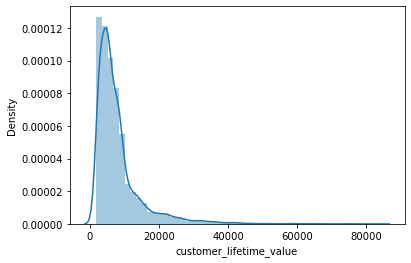

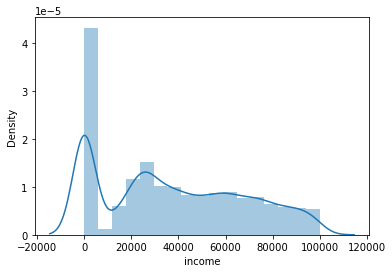

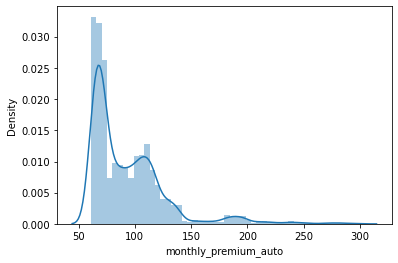

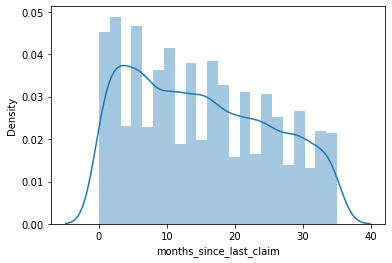

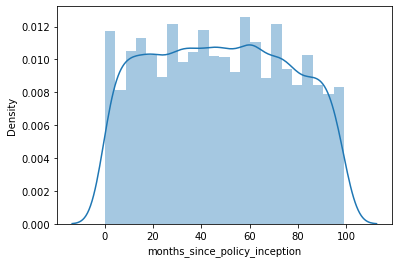

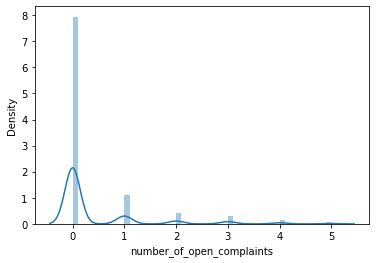

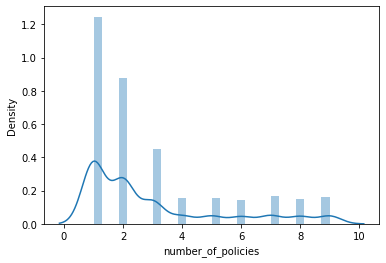

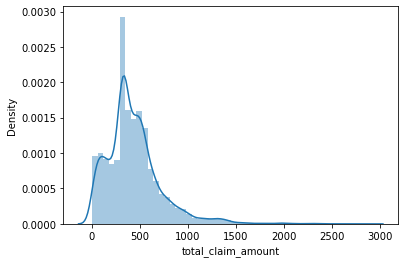

In [9]:
for column in numerical.columns:
    sns.distplot(numerical[column])  # takes to see the distribution
    plt.show()

   - **Use Matplotlib to construct histograms**

In [33]:
numerical.head(2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935


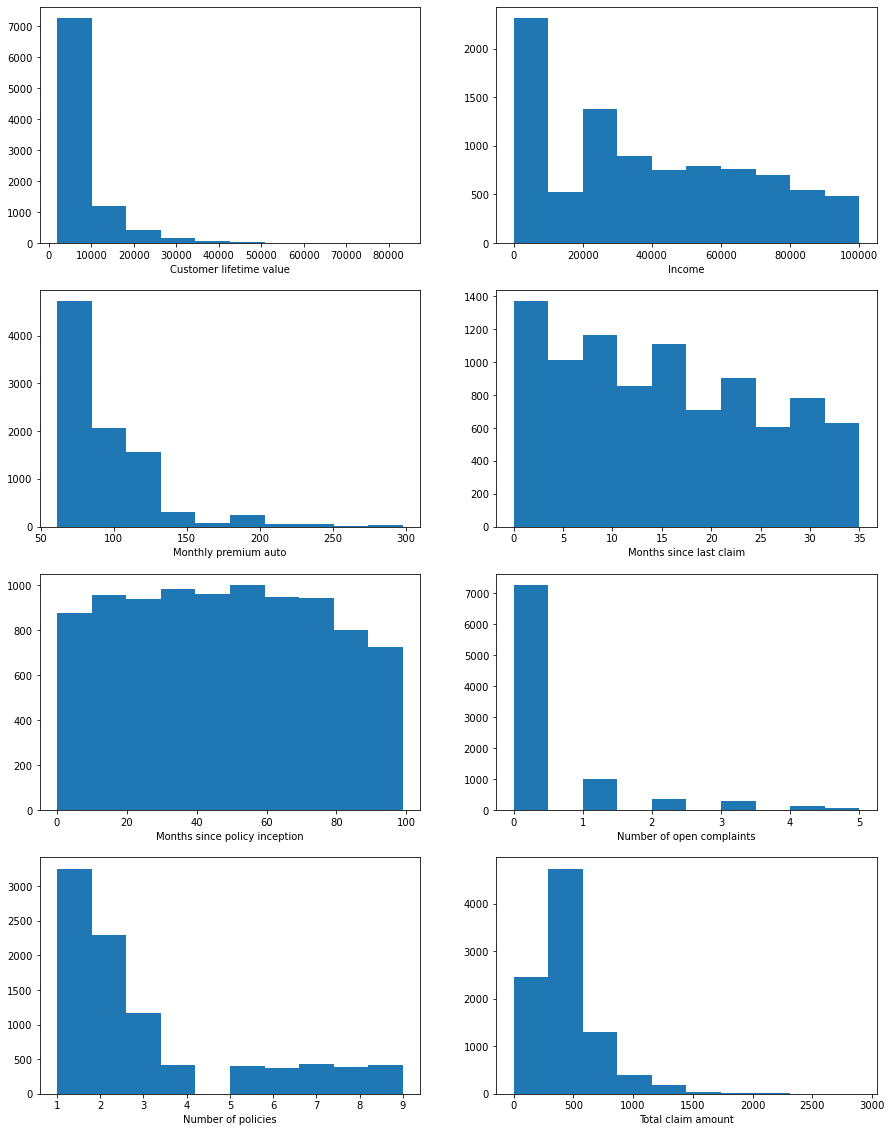

In [54]:

fig, axs = plt.subplots(4, 2)

axs[0, 0].hist(numerical['customer_lifetime_value'])
axs[0, 0].set_xlabel("Customer lifetime value")

axs[0, 1].hist(numerical['income'])
axs[0, 1].set_xlabel("Income")

axs[1, 0].hist(numerical['monthly_premium_auto'])
axs[1, 0].set_xlabel("Monthly premium auto")

axs[1, 1].hist(numerical['months_since_last_claim'])
axs[1, 1].set_xlabel("Months since last claim")

axs[2, 0].hist(numerical['months_since_policy_inception'])
axs[2, 0].set_xlabel("Months since policy inception")

axs[2, 1].hist(numerical['number_of_open_complaints'])
axs[2, 1].set_xlabel("Number of open complaints")

axs[3, 0].hist(numerical['number_of_policies'])
axs[3, 0].set_xlabel("Number of policies")

axs[3, 1].hist(numerical['total_claim_amount'])
axs[3, 1].set_xlabel("Total claim amount")

fig.set_figheight(20)
fig.set_figwidth(15)

#axs.set_title()


plt.show()

**Do the distributions for different numerical variables look like a normal distribution**

**customer_lifetime_value**

<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

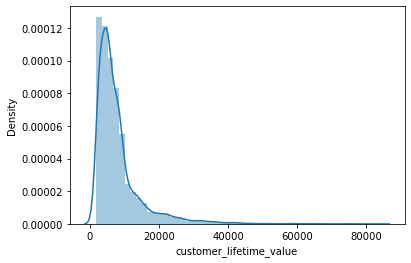

In [10]:
sns.distplot(numerical['customer_lifetime_value'])

**Income**

<AxesSubplot:xlabel='income', ylabel='Density'>

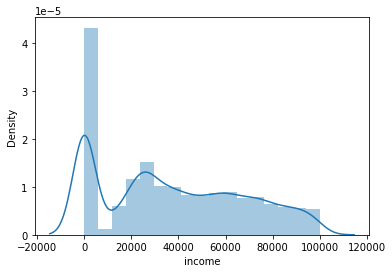

In [11]:
sns.distplot(numerical['income'])

**monthly_premium_auto**

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

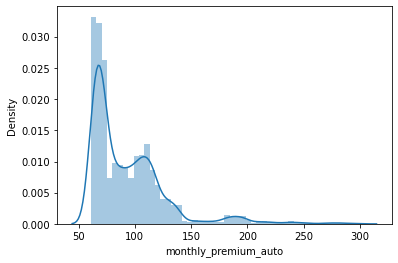

In [12]:
sns.distplot(numerical['monthly_premium_auto'])

**months_since_last_claim**

<AxesSubplot:xlabel='months_since_last_claim', ylabel='Density'>

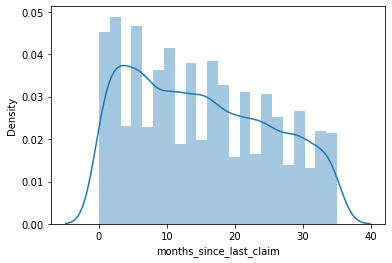

In [13]:
sns.distplot(numerical['months_since_last_claim'])

**months_since_policy_inception**

<AxesSubplot:xlabel='months_since_policy_inception', ylabel='Density'>

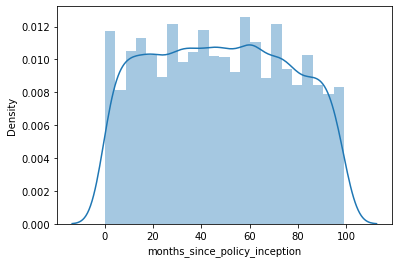

In [14]:
sns.distplot(numerical['months_since_policy_inception'])

**number_of_open_complaints**

<AxesSubplot:xlabel='number_of_open_complaints', ylabel='Density'>

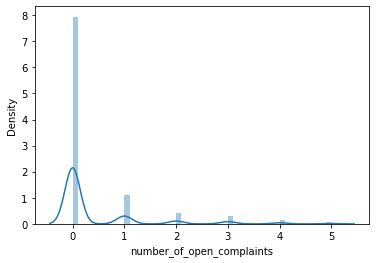

In [15]:
sns.distplot(numerical['number_of_open_complaints'])

**number_of_policies**

<AxesSubplot:xlabel='number_of_policies', ylabel='Density'>

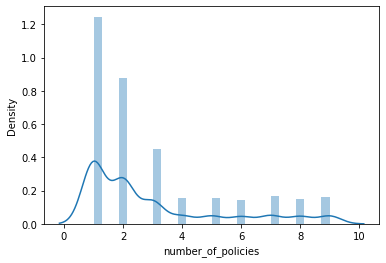

In [16]:
sns.distplot(numerical['number_of_policies'])

**total_claim_amount**

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

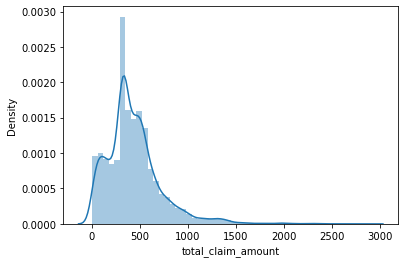

In [17]:
sns.distplot(numerical['total_claim_amount'])

 - **For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.**

In [82]:
num_cor = round(numerical.corr(),2)
num_cor

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
monthly_premium_auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
total_claim_amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


<AxesSubplot:>

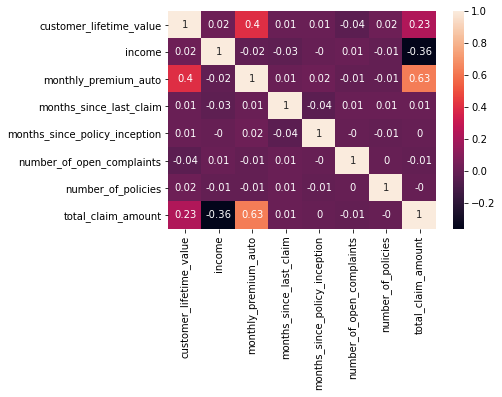

In [83]:
sns.heatmap(num_cor,annot = True)

 - **There is no pair of features that have a high correlation, hence we are not dropping any column.**